## DATA 622 - Assignment 1: Exploratory Data Analysis

### Introduction

This assignment focuses on one of the most important aspects of data science, Exploratory Data Analysis (EDA). Many surveys show that data scientists spend 60-80% of their time on data preparation. EDA allows you to identify data gaps & data imbalances, improve data quality, create better features and gain a deep understanding of your data before doing model training - and that ultimately helps train better models. In machine learning, there is a saying - "better data beats better algorithms" - meaning that it is more productive to spend time improving data quality than improving the code to train the model.

This will be an exploratory exercise, so feel free to show errors and warnings that arise during the analysis.

### Dataset

A Portuguese bank conducted a marketing campaign (phone calls) to predict if a client will subscribe to a term deposit  The records of their efforts are available in the form of a dataset. The objective here is to apply machine learning techniques to analyze the dataset and figure out most effective tactics that will help the bank in next campaign to persuade more customers to subscribe to the bank's term deposit. Download the Bank Marketing Dataset from: https://archive.ics.uci.edu/dataset/222/bank+marketing

### Assignment

#### Exploratory Data Analysis

Review the structure and content of the data and answer questions such as:
- Are the features (columns) of your data correlated?
- What is the overall distribution of each variable?
- Are there any outliers present?
- What are the relationships between different variables?
- How are categorical variables distributed?
- Do any patterns or trends emerge in the data?
- What is the central tendency and spread of each variable?
- Are there any missing values and how significant are they? 

#### Algorithm Selection

Now you have completed the EDA, what Algorithms would suit the business purpose for the dataset. Answer questions such as:

- Select two or more machine learning algorithms presented so far that could be used to train a model (no need to train models - I am only looking for your recommendations).
- What are the pros and cons of each algorithm you selected?
- Which algorithm would you recommend, and why?
- Are there labels in your data? Did that impact your choice of algorithm?
- How does your choice of algorithm relates to the dataset?
- Would your choice of algorithm change if there were fewer than 1,000 data records, and why? 

#### Pre-processing

Now you have done an EDA and selected an Algorithm, what pre-processing (if any) would you require for:

- Data Cleaning - improve data quality, address missing data, etc.
- Dimensionality Reduction - remove correlated/redundant data than will slow down training
- Feature Engineering - use of business knowledge to create new features
- Sampling Data - using sampling to resize datasets
- Data Transformation - regularization, normalization, handling categorical variables
- Imbalanced Data - reducing the imbalance between classes

### Load Libraries

In [ ]:
## load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.express as px
import matplotlib.dates as mdates


/var/folders/h4/zjq554hs0b57vqfcrc5738wh0000gn/T/ipykernel_78806/900087071.py:9: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


### Load Data

In [2]:
bank_full_url = 'https://raw.githubusercontent.com/eddiexunyc/ml_big_data_work/refs/heads/main/Assignment%201/bank/bank-full.csv'
bank_full = pd.read_csv(bank_full_url, sep=';')
bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [3]:
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
bank_full.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [5]:
bank_full.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
bank_full.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [6]:
for col in bank_full.columns:
    print(f"{col}: {bank_full[col].value_counts().get('unknown', 0)} unknowns")

age: 0 unknowns
job: 288 unknowns
marital: 0 unknowns
education: 1857 unknowns
default: 0 unknowns
balance: 0 unknowns
housing: 0 unknowns
loan: 0 unknowns
contact: 13020 unknowns
day: 0 unknowns
month: 0 unknowns
duration: 0 unknowns
campaign: 0 unknowns
pdays: 0 unknowns
previous: 0 unknowns
poutcome: 36959 unknowns
y: 0 unknowns


### Data Visualization

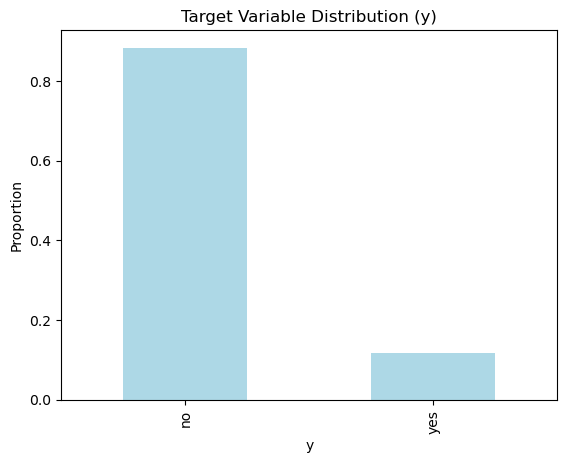

In [16]:
# target variable distribution
bank_full['y'].value_counts(normalize=True).plot(kind='bar', color='lightblue')
plt.title("Target Variable Distribution (y)")
plt.ylabel("Proportion")
plt.show()

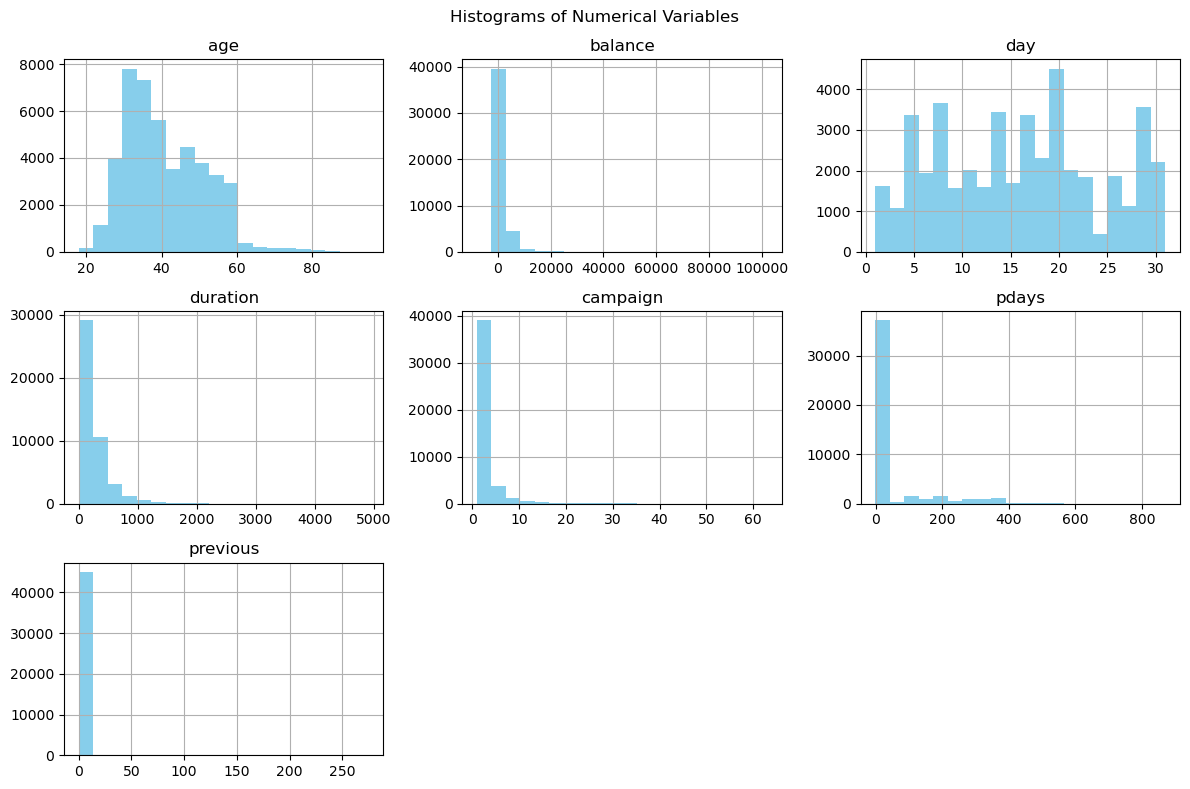

In [ ]:
# histogram on numerical variables
num_cols = bank_full.select_dtypes(include=np.number).columns.tolist()
bank_full[num_cols].hist(bins=20, figsize=(12, 8), color='skyblue')
plt.suptitle("Histograms of Numerical Variables")
plt.tight_layout()
plt.show()

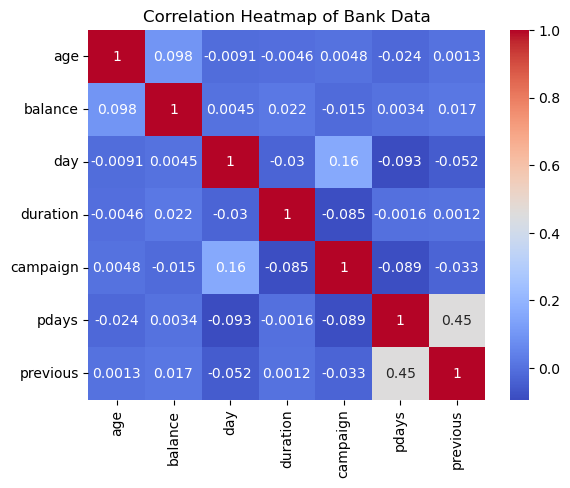

In [19]:
# correlation map
correlation = bank_full.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Bank Data")
plt.show()

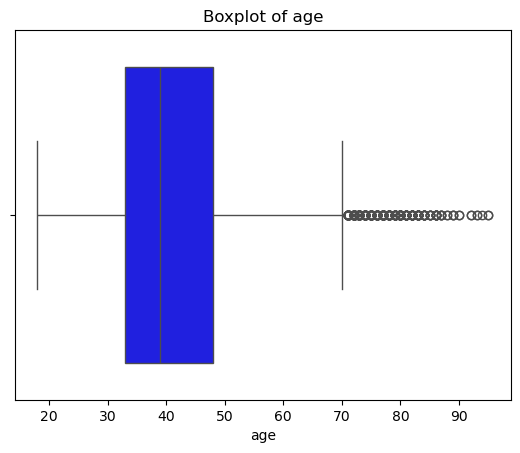

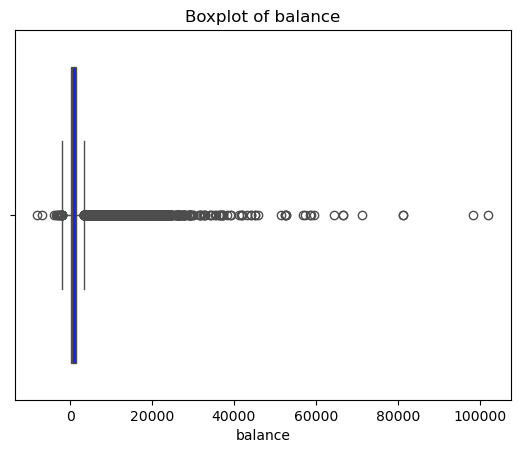

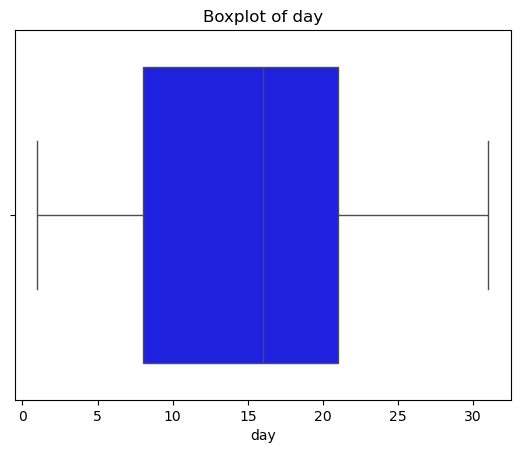

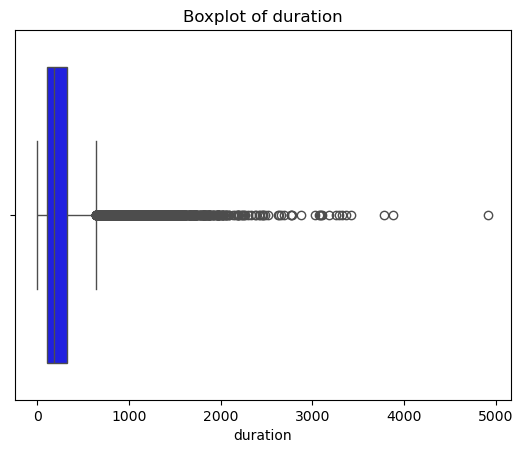

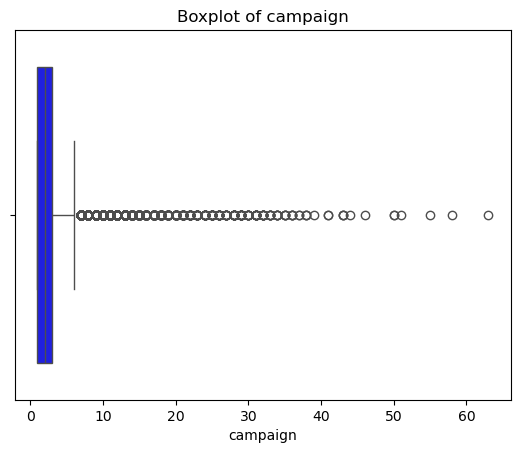

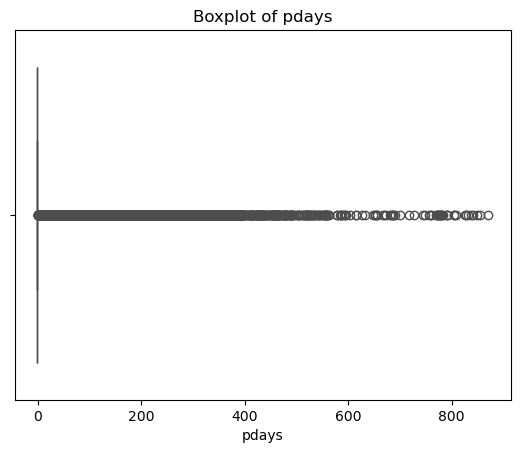

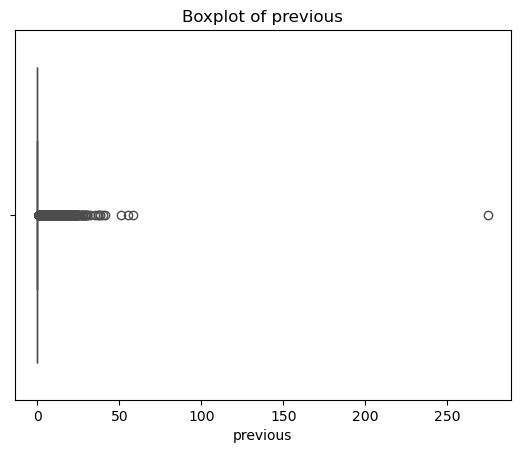

In [22]:
# boxplots for outliners
for col in num_cols:
    sns.boxplot(x=bank_full[col], color='blue')
    plt.title(f"Boxplot of {col}")
    plt.show()

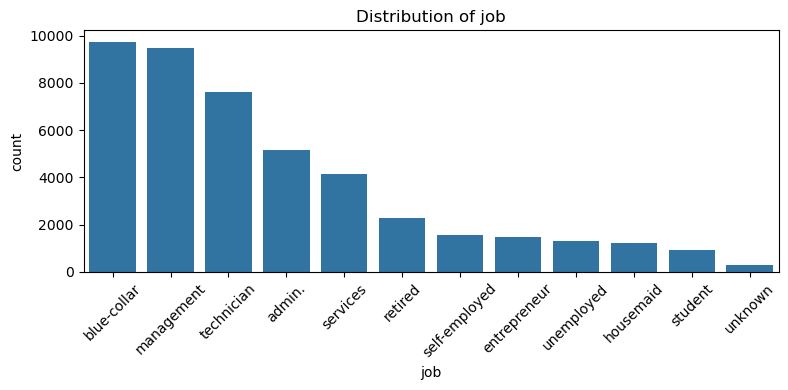

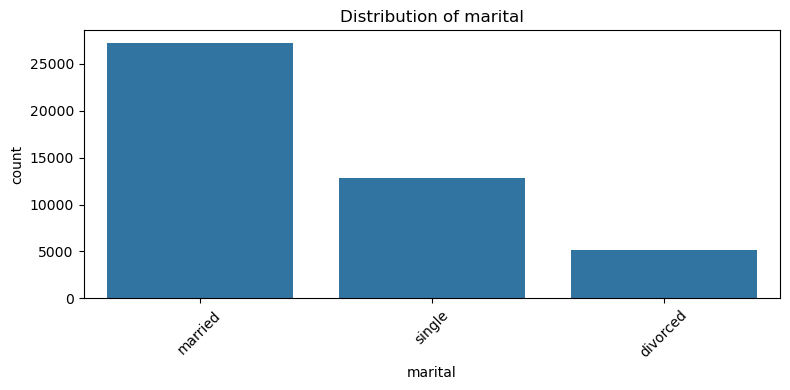

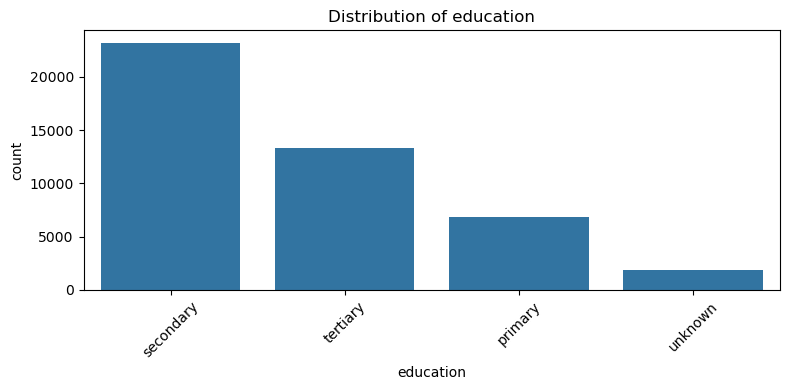

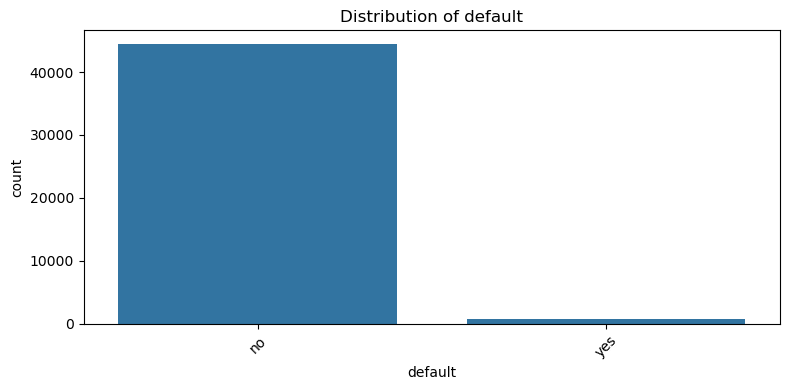

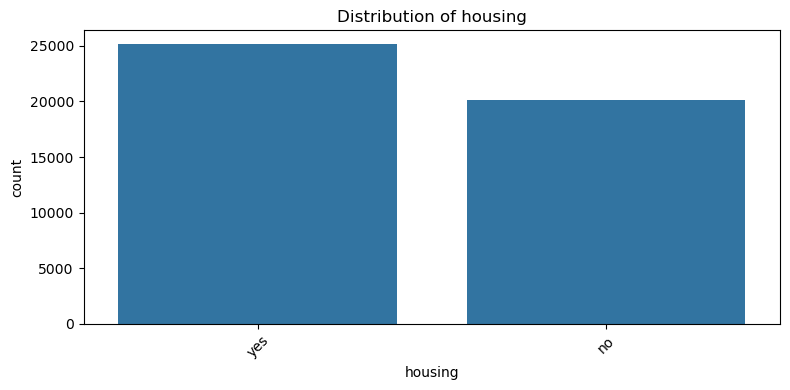

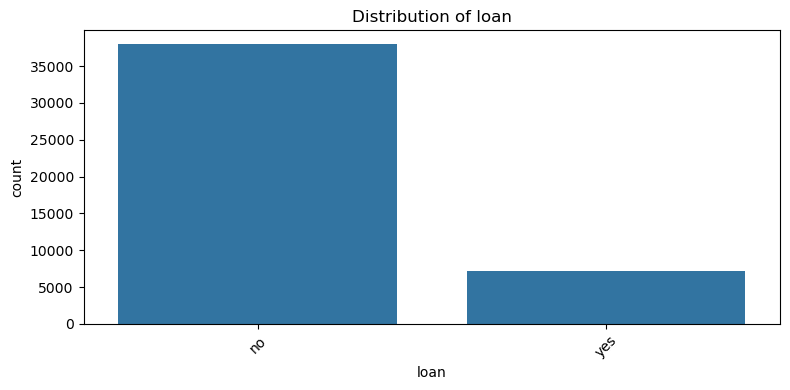

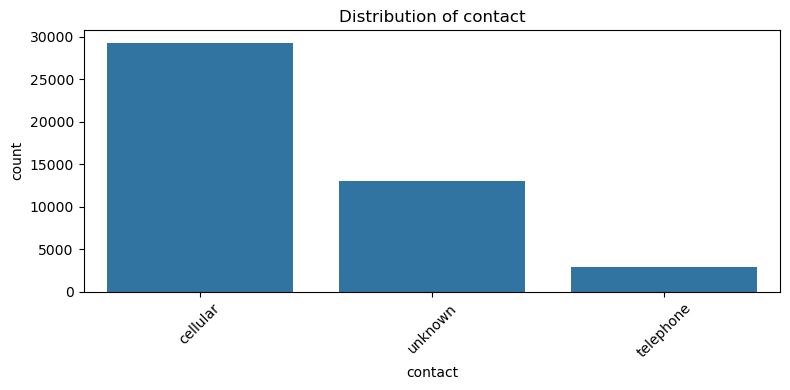

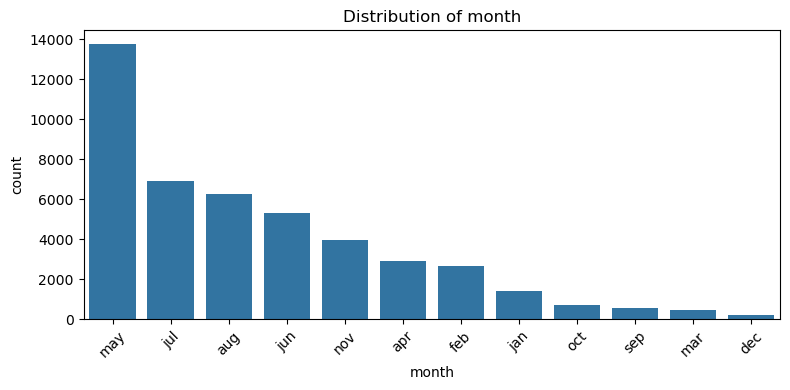

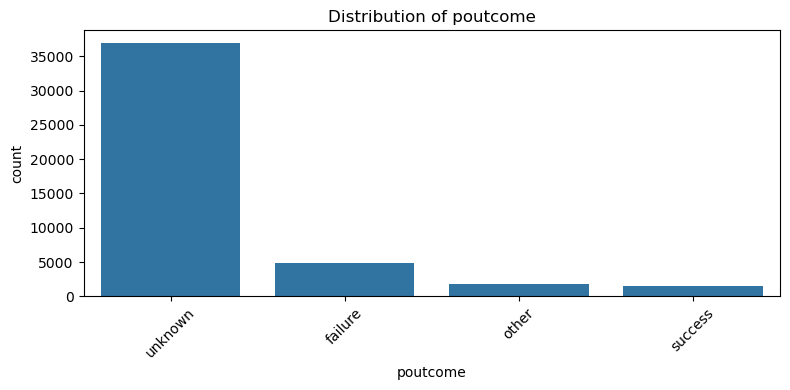

In [ ]:
# distribution on categorical variables
cat_cols = bank_full.select_dtypes(include='object').columns.tolist()
cat_cols.remove('y') 

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=bank_full, order=bank_full[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

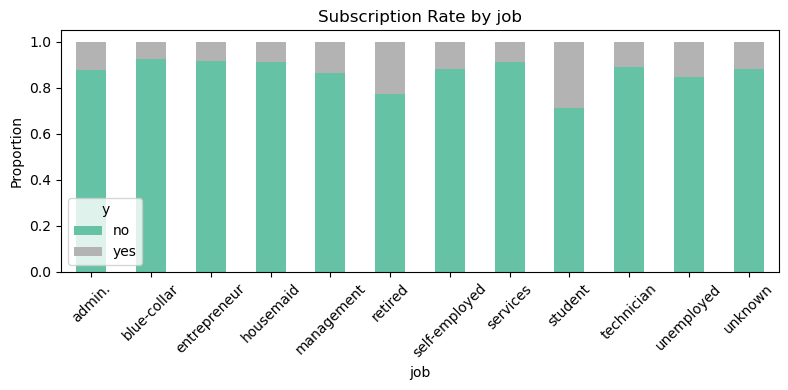

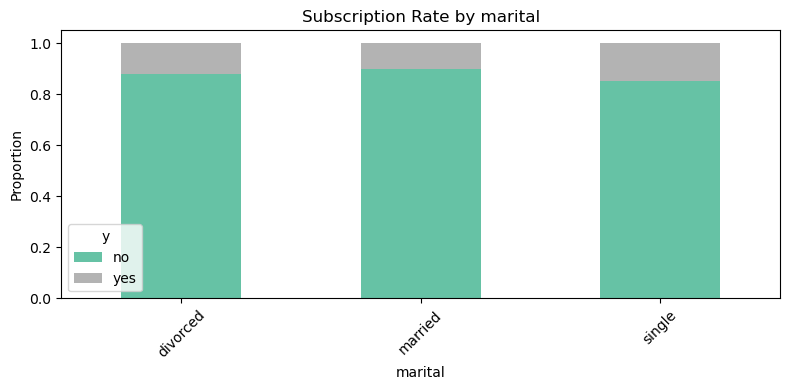

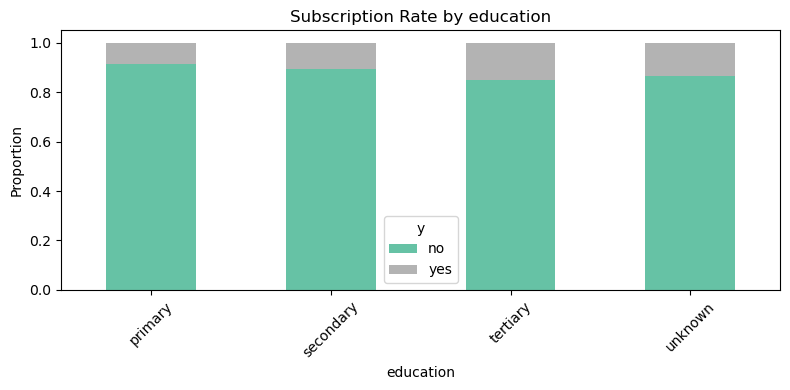

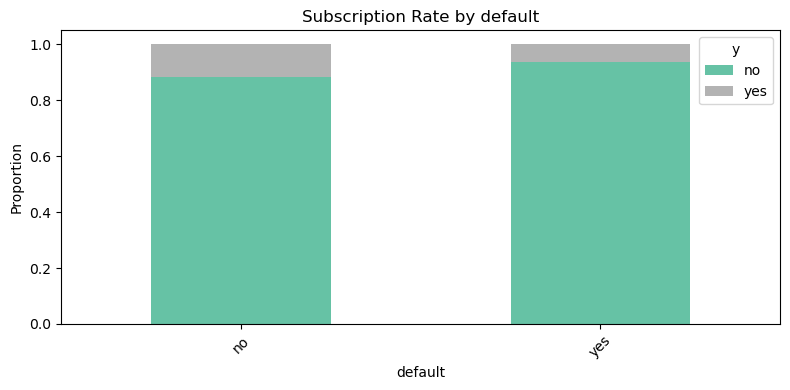

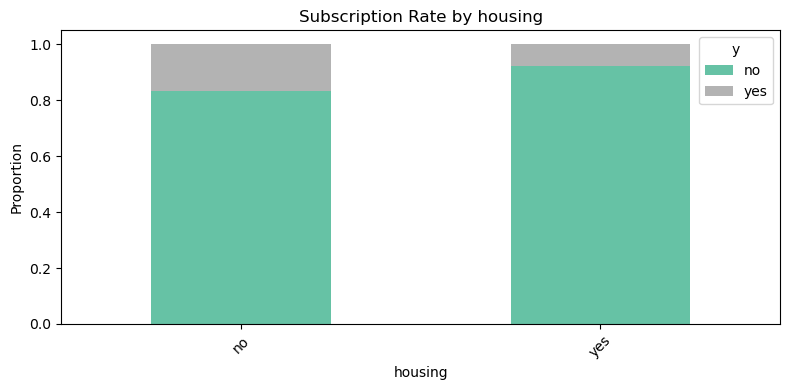

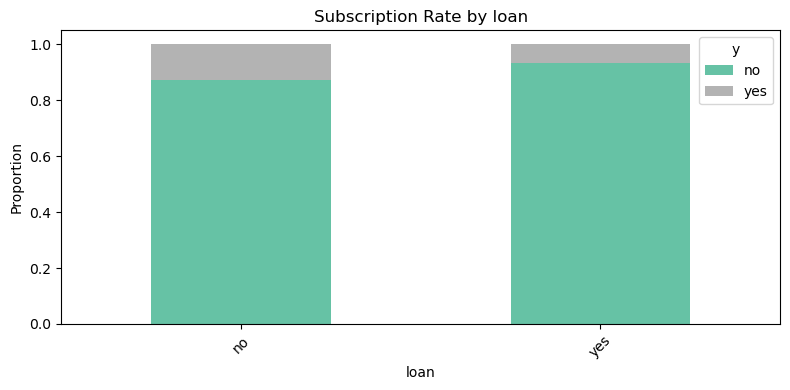

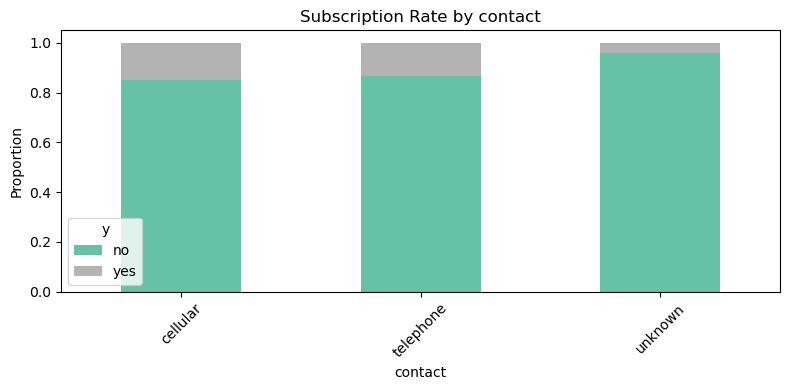

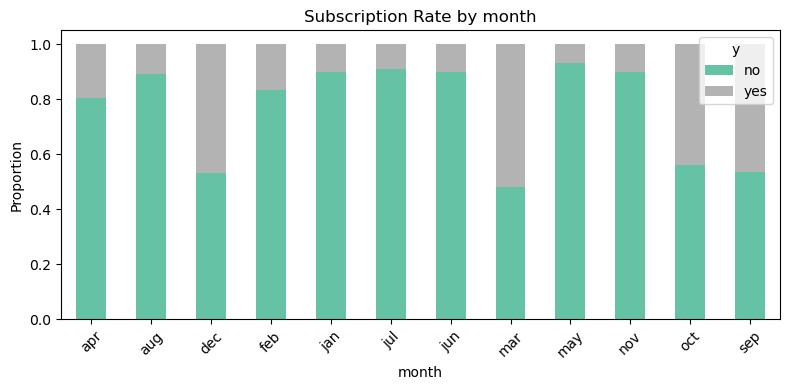

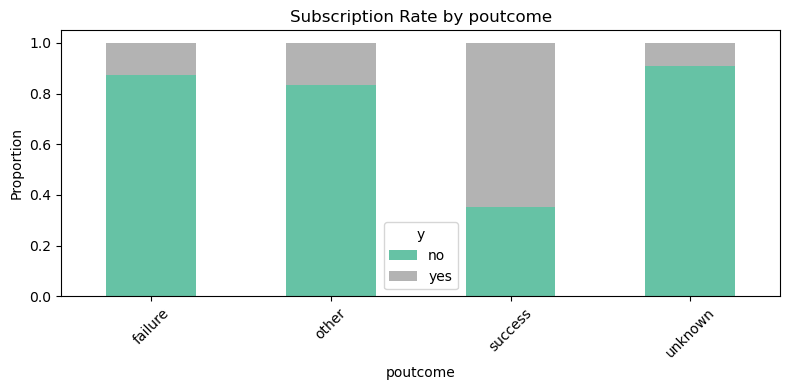

In [27]:
for col in cat_cols:
    cross_tab = pd.crosstab(bank_full[col], bank_full['y'], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, colormap='Set2', figsize=(8,4))
    plt.title(f"Subscription Rate by {col}")
    plt.ylabel("Proportion")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

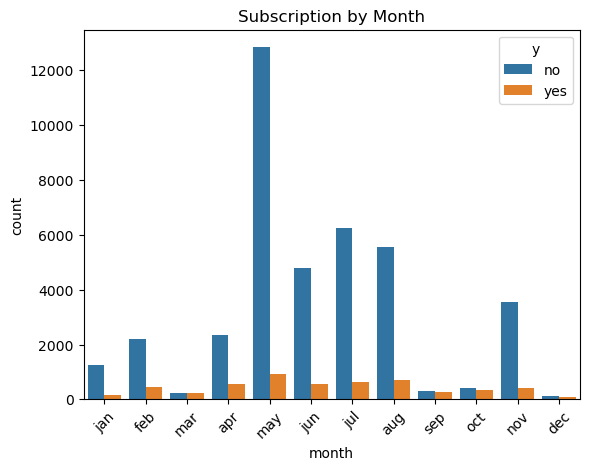

In [28]:
order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 
         'aug', 'sep', 'oct', 'nov', 'dec']

sns.countplot(x='month', data=bank_full, hue='y', order=order)
plt.title("Subscription by Month")
plt.xticks(rotation=45)
plt.show()

### Insights & Observations

For this assignment, the full data for bank marketing is selected to have a better understanding and to determine which algorithm (kNN, Bayes Naives, and LDA) is the best approach. The initial review shows that there are 17 columns (7 of them are numerical) and 45211 rows of data. There is no null value, but there are duplicate values in some of the columns with the balance variable having the highest count . The target variable in the data set is y. There are signicant counts of unknown values in some of the columns such as education, contact, and poutcome variables. 

In terms of correlation, the heatmap shows that there is a positive correlation between the age and balance variables. There is no normal distribution identified for all numerical variables. Asides from the day variable, all variables are right-skewed. For caterogical variables, it is also right-skewed.

For trends, 

For algorithm selection, LDA is the best choice compared to kNN and Bayes Naives because the selected dataset is not suited for kNN since it is over 1000 rows and the data is imbalanced. It is not suited for Bayes Naives as well because 